# Chapter 3.1. Corpus of Novels of the Spanish Silver Age: CoNSSA and CoNSSA-canon

In [1]:
import sys
import os
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from reading_robot import load_data, describe_data, get_metadata
import pandas as pd

In [2]:

#get_metadata.from_TEIP5("/home/jose/cligs/ne/","master/*.xml","metadata","beta-opt-obl-structure")


In [3]:
from shutil import copyfile
copyfile("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/metadata_beta-opt-obl-structure.csv", "/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_1/metadata_beta-opt-obl-structure.csv")
copyfile("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/population.csv", "/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_1/population.csv")
copyfile("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/population_authors.csv", "/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_1/population_authors.csv")

'/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_1/population_authors.csv'

# 3.1.3. Statistical Population of Authors

In [16]:
authors = load_data.load_metadata(wdir ="/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_1/", metadata_table = "population_authors.csv", sep = "\t")
authors = authors.fillna(0)

metadata and class shape: 	 (138, 72)


In [17]:
authors.columns

Index(['Revisado en manual de la literatura',
       'Revisado en Internet (Gutenberg, BNE, epub libre, Archive, CV, Wiki)',
       'author-full-name', 'surname', 'author-name', 'author_viaf',
       'author_bne', 'Mejores resultados encontrados en', 'Comentario',
       'Obras completas?', 'Completado', 'birth', 'death', 'madurity',
       'decade-birth', 'decade-madurity', 'decade-death', 'Volumen de Manual',
       'author-gender', 'Range', 'Page start', 'Page end', 'pages-in-MdLE',
       'Year of change', 'Source of year of change', 'novels', 'works', 'TEI',
       'nov-TEI', 'nov-paper', 'percentage', 'Porcentaje por conseguir',
       'Porcentaje que falta', 'Porcentajes negativos', 'lower than 0.1',
       'Cantidad x convertir', 'Cantidad redondeada x convertir',
       'Cantidad por comprar', 'author-movement', 'author-submovement',
       'non-novel-genre', 'Comprar', 'BNE', 'Gutenberg', 'epub libre',
       'Archive', 'CV', 'Wikisource', 'Google Books', 'Unnamed: 50',
     

In [18]:
print("Amount prose authors", authors.shape[0])

Amount prose authors 138


In [19]:
novel_authors = authors.loc[((authors['novels'] > 0))]
novel_authors["decade-birth"] = novel_authors["decade-birth"].astype(int)
novel_authors["decade-death"] = novel_authors["decade-death"].astype(int)
print("Amount novel authors", novel_authors.shape[0])

Amount novel authors 107


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
novel_authors.head()

,Revisado en manual de la literatura,"Revisado en Internet (Gutenberg, BNE, epub libre, Archive, CV, Wiki)",author-full-name,surname,author-name,author_viaf,author_bne,Mejores resultados encontrados en,Comentario,Obras completas?,...,cv boolean,wikisource bool,google bool,sumatorio de proyectos que han digitalizado al autor,sum html,sum pdf,ranges digitalizacion,to_scan_temp,Porcentaje por conseguir0,Porcentaje que falta0
orden,,,,,,,,,,,,,,,,,,,,,
59.0,1.0,1.0,José María de Acosta,Acosta,Acosta,46583137.0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0
72.0,1.0,1.0,Antonio Espina,Espina,AEspina,24724313.0,XX828940,0,0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.2,0.8
13.0,1.0,1.0,Pedro Antonio Alarcón,Alarcón,Alarcon,44294383.0,XX920308,https://www.epublibre.org/autor/index/116,0,0.0,...,1.0,1.0,1.0,7.0,4.0,3.0,3.0,0.0,0.2,0.8
43.0,1.0,1.0,Rafael Altamira,Altamira,Altamira,0.0,0,0,0,0.0,...,1.0,0.0,0.0,4.0,2.0,2.0,2.0,0.0,0.5,-0.5
105.0,1.0,1.0,Antonio Machado,Machado,AMachado,7385547.0,XX991518,0,0,0.0,...,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.2,0.8


In [21]:
dataset = "population of authors"
wdir ="/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_1/"


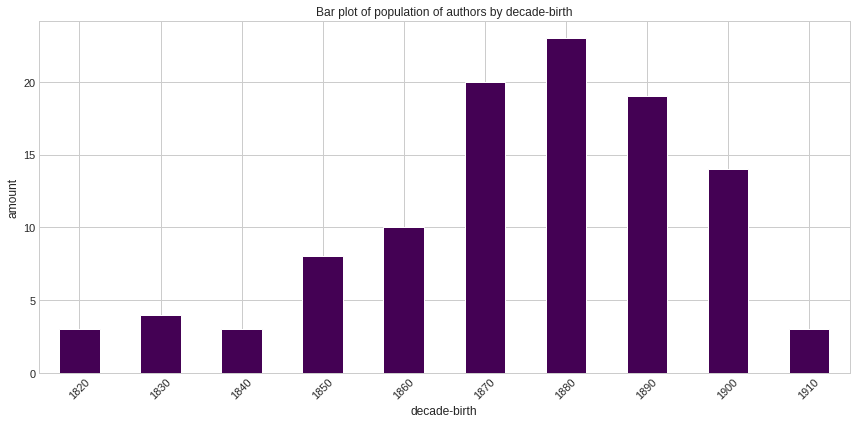

In [22]:
describe_data.grouped_bars(wdir = wdir, metadata = novel_authors, class_ = "decade-birth", dataset = dataset)


In [23]:
novel_authors.loc[((novel_authors['novels'] > 0))]["decade-birth"].mode()

0    1880
dtype: int64

In [24]:
print(novel_authors.loc[((novel_authors['novels'] > 0))]["birth"].median(),
      novel_authors.loc[((novel_authors['novels'] > 0))]["birth"].quantile(0.25),
      novel_authors.loc[((novel_authors['novels'] > 0))]["birth"].quantile(0.75),
      novel_authors.loc[((novel_authors['novels'] > 0))]["birth"].quantile(0.75) - authors.loc[((authors['novels'] > 0))]["birth"].quantile(0.25),
      1881+28,
      1881-28)
      

1881.0 1867.0 1895.0 28.0 1909 1853


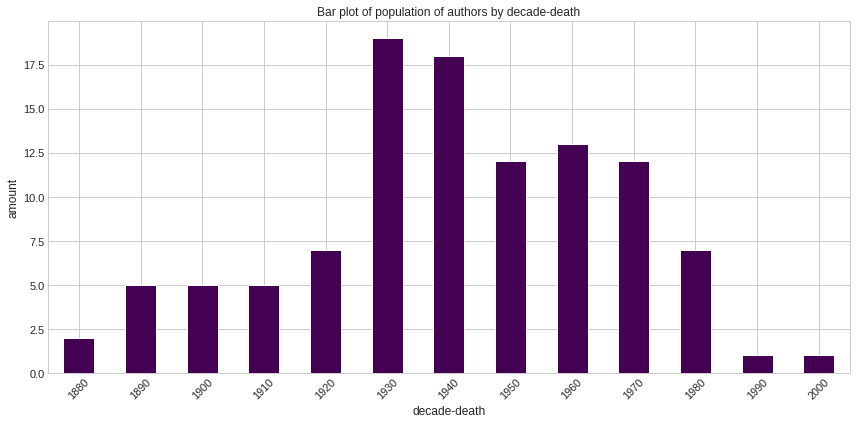

In [25]:
describe_data.grouped_bars(wdir = wdir, metadata = novel_authors, class_ = "decade-death", dataset = dataset)


In [26]:
median_death = novel_authors.loc[((novel_authors['novels'] > 0))]["death"].median()
q1_death = novel_authors.loc[((novel_authors['novels'] > 0))]["death"].quantile(0.25)
q3_death = novel_authors.loc[((novel_authors['novels'] > 0))]["death"].quantile(0.75)
iqr_death = q3_death - q1_death
print(median_death , q1_death, q3_death, iqr_death, median_death + iqr_death, median_death - iqr_death)


1945.0 1932.5 1964.0 31.5 1976.5 1913.5


# 3.1.4. Statistical Population of Prose

In [27]:
population_prose = load_data.load_metadata(wdir ="/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_1/", metadata_table = "population.csv", sep = "\t")
population_prose = population_prose.loc[(population_prose['MdLE'] == 1)].copy()
print(population_prose.shape)
dataset = "population of prose"

metadata and class shape: 	 (1674, 66)
(1426, 66)


In [28]:
population_prose.columns

Index(['estudiable', 'MdLE', 'HdLE5-solo novelas', 'HdLE6-solo novelas',
       'HdLE7-solo novelas', 'HdLE-solo novelas', 'Criteria', 'CoNSSA-canon',
       'CoNSSA', 'author-name', 'full-title', 'quality', 'public', 'brow',
       'title', 'year', 'genre', 'genre_orig', 'subgenre', 'HdLE5-7 subgenre',
       'Genre-topic', 'Author-period', 'text-movement', 'text-movement-2',
       'goal', 'source-full', 'source', 'format', 'status', 'cert_date',
       'cert_genre', 'Source-link', 'Source-link2', 'Comments',
       'text-TOC-range', 'Order', 'text-histlit-pages-MdLE', 'rand-freq-order',
       'text-histlit-paragraph-novels-MdLE', 'author-volume-MdLE',
       'author-pages', 'century', 'decade', 'Start-pag', 'End-page',
       'author-start-page', 'Textbox 1', 'Textbox 2', 'Corpus 201512',
       'Corpus1-3romances', 'Corpus2 – 3short stories',
       'Corpus3 – romances vs short stories same author', 'Corpus-Delta',
       'Date of downloading', 'Control', 'Link second hand', 'Sour

In [29]:
print("Prose works in MdLE")
population_prose.shape

Prose works in MdLE


(1426, 66)

In [30]:
population_prose.loc[(population_prose['genre'] == "?")].shape

(62, 66)

In [31]:
len(set(Counter(population_prose["genre"]).most_common()))

19

In [32]:
for genre in Counter(population_prose["genre"]).most_common():
        print(genre[0], genre[1], round(genre[1]/population_prose.shape[0],2)*100)

novela 727 51.0
ensayo 210 15.0
cuentos 149 10.0
novela corta 87 6.0
? 62 4.0
biografía 34 2.0
cuento 32 2.0
novelas cortas 28 2.0
libro de viaje 20 1.0
crónica 13 1.0
autobiografía 12 1.0
prosa lírica 11 1.0
estampas 10 1.0
greguerías 9 1.0
diálogo 9 1.0
memorias 6 0.0
libro infantil 3 0.0
diario 2 0.0
aforismos 2 0.0


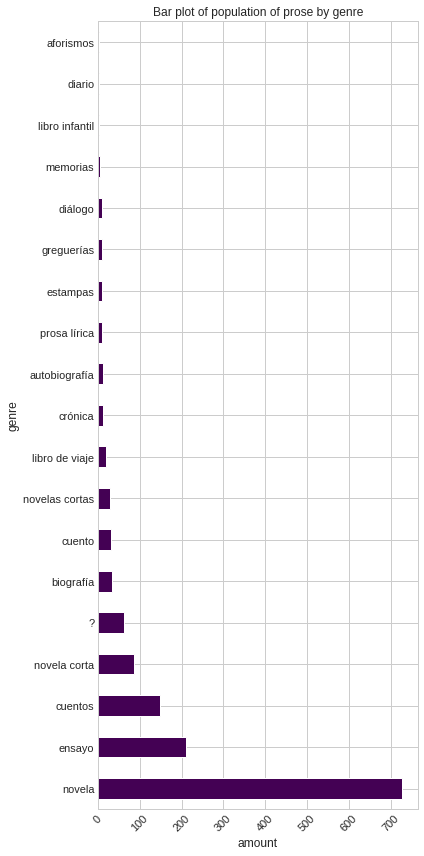

In [33]:
describe_data.grouped_bars(wdir = wdir, metadata = population_prose, class_ = "genre", dataset = dataset, horizontal =True)


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


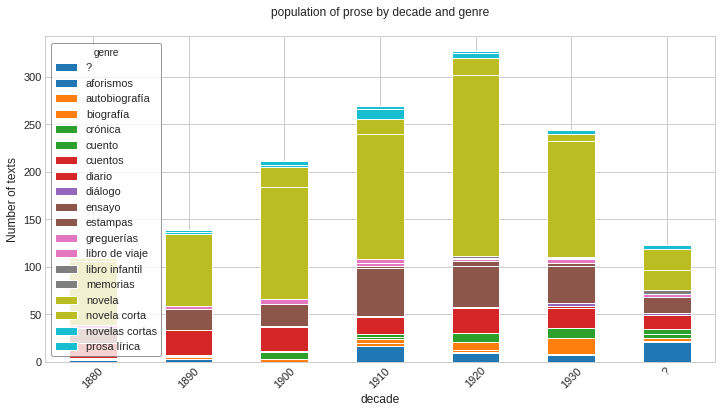

In [34]:
describe_data.describe_corpus_stackedbars(wdir = wdir, metadata = population_prose, class_1 = "decade", class_2 = "genre", dataset = dataset, cmap="tab10")

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


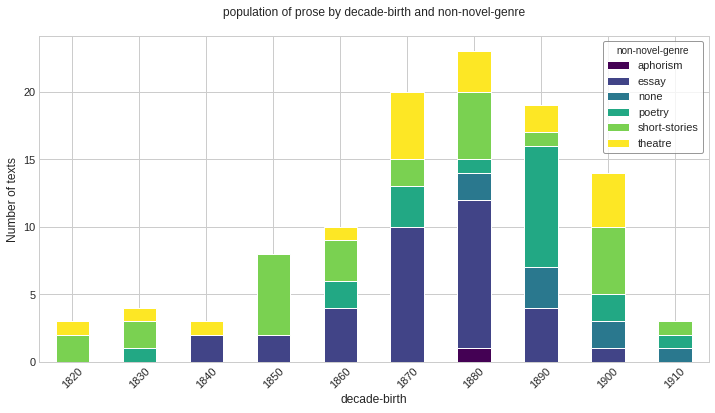

In [35]:
describe_data.describe_corpus_stackedbars(wdir = wdir, metadata = novel_authors, class_1 = "decade-birth", class_2 = "non-novel-genre", dataset = dataset, loc_legend ="upper right")


# 3.1.5. Statistical Population of Novels

In [36]:
population_prose = load_data.load_metadata(wdir ="/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_1/", metadata_table = "population.csv", sep = "\t")

population_prose = population_prose.loc[(population_prose['MdLE'] == 1)].copy()
population_novels_and_doubts = population_prose.loc[population_prose["genre"].isin(["?", "novela"])].copy()
population_novels_and_doubts.shape


metadata and class shape: 	 (1674, 66)


(789, 66)

In [37]:
Counter(population_novels_and_doubts["genre_orig"].fillna("?"))

Counter({'?': 54,
         'autobiografía': 2,
         'biografía': 2,
         'cartas de opinión': 1,
         'ensayo': 1,
         'novela': 727,
         'poemas en prosa': 1,
         'prosa lírica': 1})

In [38]:
population_novels = population_prose.loc[(population_prose['genre'] == "novela")].copy()
dataset= "population of novels"

In [39]:
population_novels.columns

Index(['estudiable', 'MdLE', 'HdLE5-solo novelas', 'HdLE6-solo novelas',
       'HdLE7-solo novelas', 'HdLE-solo novelas', 'Criteria', 'CoNSSA-canon',
       'CoNSSA', 'author-name', 'full-title', 'quality', 'public', 'brow',
       'title', 'year', 'genre', 'genre_orig', 'subgenre', 'HdLE5-7 subgenre',
       'Genre-topic', 'Author-period', 'text-movement', 'text-movement-2',
       'goal', 'source-full', 'source', 'format', 'status', 'cert_date',
       'cert_genre', 'Source-link', 'Source-link2', 'Comments',
       'text-TOC-range', 'Order', 'text-histlit-pages-MdLE', 'rand-freq-order',
       'text-histlit-paragraph-novels-MdLE', 'author-volume-MdLE',
       'author-pages', 'century', 'decade', 'Start-pag', 'End-page',
       'author-start-page', 'Textbox 1', 'Textbox 2', 'Corpus 201512',
       'Corpus1-3romances', 'Corpus2 – 3short stories',
       'Corpus3 – romances vs short stories same author', 'Corpus-Delta',
       'Date of downloading', 'Control', 'Link second hand', 'Sour

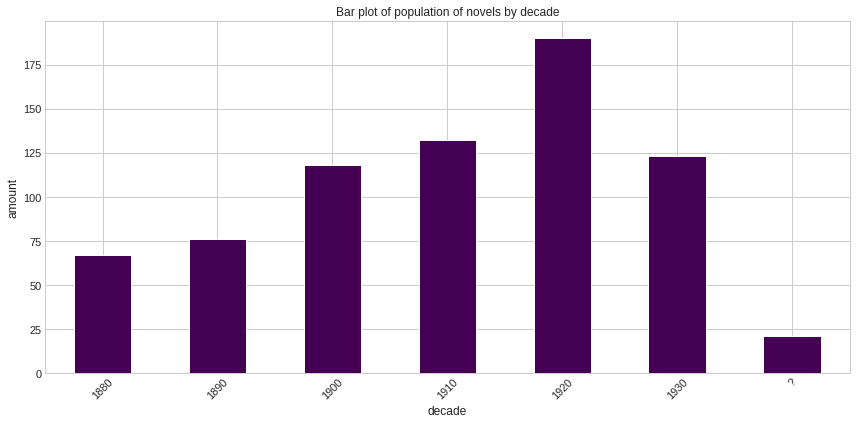

In [40]:
describe_data.grouped_bars(wdir = wdir, metadata = population_novels, class_ = "decade", dataset = dataset)


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


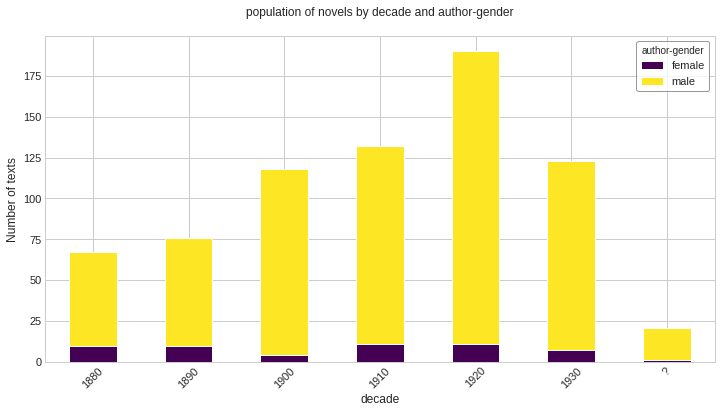

In [41]:
describe_data.describe_corpus_stackedbars(wdir = wdir, metadata = population_novels, class_1 = "decade", class_2 = "author-gender", dataset = dataset, cmap="viridis", loc_legend ="upper right")

In [42]:
print("amount of novels in MdLE",
    population_novels.loc[(population_novels['genre'] == "novela" )].shape)

amount of novels in MdLE (727, 66)


In [43]:
print("amount of others in MdLE",
    population_novels_and_doubts.loc[(population_novels_and_doubts['genre'] == "?" )].shape)

amount of others in MdLE (62, 66)


In [44]:
population_novels.loc[(population_novels['genre'] == "novela" )].shape[0] + population_novels.loc[(population_novels['genre'] == "?" )].shape[0]


727

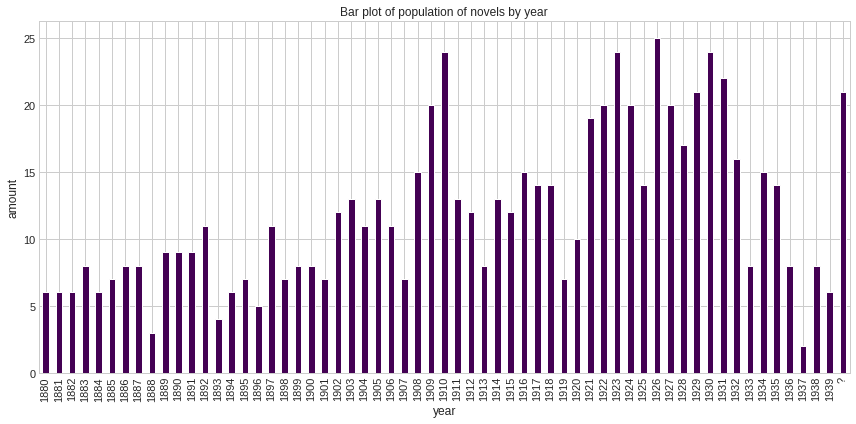

In [45]:
describe_data.grouped_bars(wdir = wdir, metadata = population_novels, class_ = "year", dataset = dataset, rot = 90)

In [46]:
population_novels.loc[population_novels["subgenre"].notnull()].shape

(349, 66)

In [47]:
len(set(population_novels["subgenre"]))

89

In [48]:
for genre in Counter(population_novels["subgenre"]).most_common():
        print(genre[0], genre[1], round(genre[1]/population_novels.shape[0],2)*100)

nan 378 52.0
novela erótica 38 5.0
episodio nacional 30 4.0
novela histórica 28 4.0
novela naturalista 23 3.0
novela social 18 2.0
novela realista 12 2.0
novela de aventuras 8 1.0
novela humorística 8 1.0
novelas de la carne 8 1.0
novelas de la vida 7 1.0
novelas sevillanas 6 1.0
novela sentimental 5 1.0
novela valenciana 5 1.0
novelas cortas 5 1.0
novela lírica 5 1.0
novelas de transición 5 1.0
novela provinciana 5 1.0
novela de tesis 4 1.0
novela regional 4 1.0
novela de crítica social 4 1.0
novela de guerra 4 1.0
novelas del alma 4 1.0
novelas de crítica social 4 1.0
género intermedio (novela y ensayo) 3 0.0
novela fantástica 3 0.0
novela dialogada 3 0.0
novela impresionista 3 0.0
novelas de la montaña 3 0.0
novelas de la guerra 3 0.0
novela autobiográfica 3 0.0
novela dramática 3 0.0
novela simbólica 3 0.0
novela americana 3 0.0
novela vanguardista 3 0.0
novela toledada 3 0.0
novelas de la mujer 3 0.0
novelas alucinantes 3 0.0
novela expresionista 3 0.0
novela 2 0.0
novela corta 2 

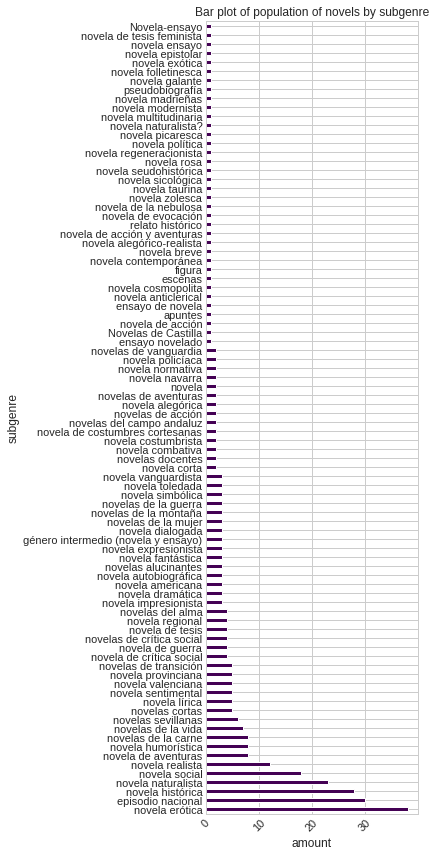

In [49]:
describe_data.grouped_bars(wdir = wdir, metadata = population_novels.loc[population_novels["subgenre"].notnull()], class_ = "subgenre", dataset = dataset, horizontal =True)

In [50]:
Counter(population_novels["subgenre"]).most_common(20)

[(nan, 378),
 ('novela erótica', 38),
 ('episodio nacional', 30),
 ('novela histórica', 28),
 ('novela naturalista', 23),
 ('novela social', 18),
 ('novela realista', 12),
 ('novela de aventuras', 8),
 ('novela humorística', 8),
 ('novelas de la carne', 8),
 ('novelas de la vida', 7),
 ('novelas sevillanas', 6),
 ('novela sentimental', 5),
 ('novela valenciana', 5),
 ('novelas cortas', 5),
 ('novela lírica', 5),
 ('novelas de transición', 5),
 ('novela provinciana', 5),
 ('novela de tesis', 4),
 ('novela regional', 4)]

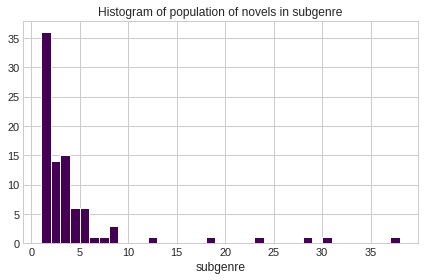

In [51]:
class_counter = Counter(population_novels["subgenre"])
describe_data.histogram_counter(wdir = wdir, class_counter = class_counter, class_ = "subgenre", dataset = dataset, bins = 37)

In [52]:
len([value for key,value in class_counter.items() if value == 1])

36

In [53]:
len([value for key,value in class_counter.items() if value <= 3])

65

In [54]:
wdir

'/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_1/'

(8, 6)


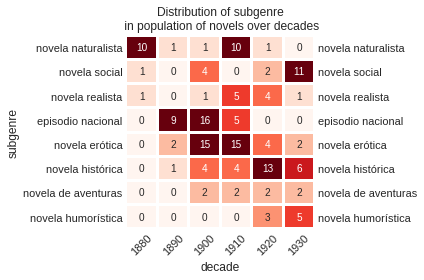

In [55]:
describe_data.chronological_heatmap(wdir = wdir, dataset = dataset, metadata = population_novels.loc[population_novels["subgenre"].isin(["novela naturalista","episodio nacional","novela realista","novela erótica","novela histórica","novela social","novela de aventuras","novela humorística"])], class_1 = "decade", class_2 = "subgenre")

In [56]:
Counter(population_novels["author-name"]).most_common(20)[0]

('Galdos', 56)

(21, 5)
(3.5, 11.5)


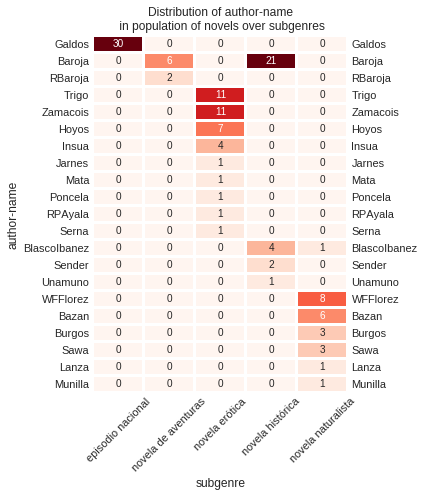

In [57]:
describe_data.chronological_heatmap(wdir = wdir, dataset = dataset, metadata = population_novels.loc[ population_novels["subgenre"].isin(["novela naturalista","episodio nacional","novela erótica","novela histórica","novela de aventuras"])], class_1 = "subgenre", class_2 = "author-name")

# 3.1.6. Definition of the Corpora: CoNSSA and CoNSSA-canon

In [58]:
wdir

'/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_1/'

In [59]:
population_prose = load_data.load_metadata(wdir = wdir, metadata_table = "population.csv", sep = "\t")

population_prose = population_prose.loc[(population_prose['MdLE'] == 1)].copy()
population_prose.shape


metadata and class shape: 	 (1674, 66)


(1426, 66)

In [60]:
population_prose.loc[population_prose["CoNSSA-canon"] == 1].shape

(138, 66)

In [61]:
population_prose.loc[population_prose["CoNSSA"] == 0].shape

(1068, 66)

In [62]:
population_prose.loc[population_prose["CoNSSA"] == 1].shape

(358, 66)

In [63]:
population_prose.loc[population_prose["CoNSSA-canon"] == 1].shape

(138, 66)

In [64]:
population_prose.loc[ (population_prose["CoNSSA"] == 1) & (population_prose["CoNSSA-canon"] == 0)].shape

(220, 66)

In [65]:
Counter(population_prose.loc[ (population_prose["CoNSSA"] == 1) & (population_prose["CoNSSA-canon"] == 0)]["genre"])

Counter({'?': 12, 'greguerías': 2, 'novela': 206})

In [66]:
Counter(population_prose.loc[ (population_prose["CoNSSA"] == 1) & (population_prose["CoNSSA-canon"] == 1)]["genre"])

Counter({'novela': 138})

In [67]:
206+12+2

220

In [68]:
208+136

344

In [69]:
138+220


358

In [70]:
(136+208) / population_prose.loc[population_prose["genre"] == "novela"].shape[0]

0.4731774415405777

metadata and class shape: 	 (358, 177)
['idno', 'author.name', 'title', 'year', 'supergenre', 'genre', 'subgenre.cligs.important', 'author.country', 'author.viaf', 'author.bne', 'author.gender', 'title.main', 'title.viaf', 'title.bne', 'author.name.full', 'subtitle', 'availability', 'subgenre.cligs', 'genre.analyzed', 'genre.analyzed.cert', 'date.file', 'digital.source', 'digital.source.format', 'genre.subtitle', 'narrator', 'protagonist.gender', 'setting.type', 'form', 'publication', 'digital.source.idno', 'author.continent', 'authorText.group', 'authorText.subgroup', 'protagonist.name', 'protagonist.age', 'protagonist.socLevel', 'protagonist.profession', 'representation', 'setting.continent', 'setting.country', 'setting.settlement', 'setting.territory', 'text.movement', 'time.period', 'time.span', 'authorText.relation', 'end', 'time.year', 'keywords.cert', 'author.movement', 'author.submovement', 'author.date.birth', 'author.date.death', 'litHist.literaryQuality', 'litHist.brow', 'li

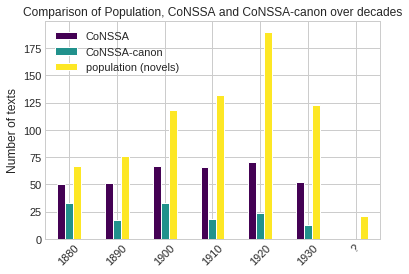

In [73]:
corpus = load_data.load_metadata(wdir = wdir, metadata_table = "metadata_beta-opt-obl-structure.csv", sep = ",")
print( corpus.columns.tolist(), end=" ")
print(corpus.shape)

populations_number_texts = population_novels.loc[population_novels["genre"] == "novela"].groupby(["decade"])["full-title"].count()

conssa_number_texts = corpus.loc[corpus["CoNSSA"] == True].groupby(["decade"])["title"].count() 

conssa_number_texts.index= conssa_number_texts.index.astype(str)

conssa_canon_number_texts =  corpus.loc[corpus["CoNSSA.canon"] == True].groupby(["decade"])["title"].count()

conssa_canon_number_texts.index = conssa_canon_number_texts.index.astype(str)

comparition = pd.DataFrame([conssa_number_texts,conssa_canon_number_texts,populations_number_texts], index=["CoNSSA","CoNSSA-canon","population (novels)"]).T.fillna(0)

fig = comparition.plot.bar(cmap = "viridis")

plt.xticks(rotation=45)

plt.ylabel("Number of texts")
plt.title("Comparison of Population, CoNSSA and CoNSSA-canon over decades")

plt.savefig(wdir + "/visualisations/compare_population_connsa.png", dpi=300)


plt.show(fig)

# 3.1.9. Description of the Corpus

In [74]:
metadata = load_data.load_metadata(wdir = wdir, metadata_table = "metadata_beta-opt-obl-structure.csv", sep = ",")
dataset = "CoNSSA"
metadata.shape

metadata and class shape: 	 (358, 177)


(358, 177)

In [75]:
metadata.columns.tolist()

['idno',
 'author.name',
 'title',
 'year',
 'supergenre',
 'genre',
 'subgenre.cligs.important',
 'author.country',
 'author.viaf',
 'author.bne',
 'author.gender',
 'title.main',
 'title.viaf',
 'title.bne',
 'author.name.full',
 'subtitle',
 'availability',
 'subgenre.cligs',
 'genre.analyzed',
 'genre.analyzed.cert',
 'date.file',
 'digital.source',
 'digital.source.format',
 'genre.subtitle',
 'narrator',
 'protagonist.gender',
 'setting.type',
 'form',
 'publication',
 'digital.source.idno',
 'author.continent',
 'authorText.group',
 'authorText.subgroup',
 'protagonist.name',
 'protagonist.age',
 'protagonist.socLevel',
 'protagonist.profession',
 'representation',
 'setting.continent',
 'setting.country',
 'setting.settlement',
 'setting.territory',
 'text.movement',
 'time.period',
 'time.span',
 'authorText.relation',
 'end',
 'time.year',
 'keywords.cert',
 'author.movement',
 'author.submovement',
 'author.date.birth',
 'author.date.death',
 'litHist.literaryQuality',
 'lit

In [76]:
metadata.loc[metadata["genre"] == "novela"].shape

(344, 177)

In [77]:
metadata.loc[metadata["genre"] == "novela"].shape[0] / population_novels.shape[0]


0.4731774415405777

In [78]:
metadata["am.tokens"].sum() 

22566863

In [79]:
metadata["am.punctuations"].sum()

4146429

In [80]:
metadata["am.tokens"].sum() + metadata["am.punctuations"].sum()

26713292

In [81]:
metadata_canon = metadata.loc[metadata["CoNSSA.canon"] == True]

In [82]:
metadata.loc[metadata["CoNSSA.canon"] == True].shape

(138, 177)

In [83]:
metadata.loc[metadata["CoNSSA.canon"] == True].shape[0] / population_novels.shape[0]


0.18982118294360384

In [84]:
metadata_canon["am.punctuations"].sum()

1868494

In [85]:
metadata_canon["am.tokens"].sum() + metadata_canon["am.punctuations"].sum()

11591722

In [86]:
novel_authors.index = novel_authors["author-name"]

In [87]:
novel_authors.sort_values(by="pages-in-MdLE", ascending=False)[["pages-in-MdLE","percentage"]]

,pages-in-MdLE,percentage
author-name,,
Galdos,181.0,0.58
Unamuno,167.0,0.86
Valle,162.0,1.00
RamonJimenez,153.0,1.00
Baroja,117.0,0.65
Azorin,107.0,0.89
AMachado,103.0,1.00
Lorca,95.0,1.00
Hernandez,66.0,1.00


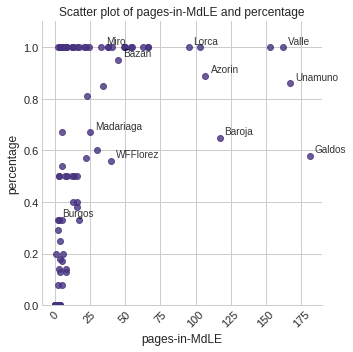

In [88]:
describe_data.describe_corpus_scatter(metadata = novel_authors, class_1 = "pages-in-MdLE", class_2 = "percentage", wdir = wdir, dataset = dataset, fit_reg=False, annotation_lt=["Galdos","Unamuno","Valle","Baroja","Azorin","Bazan","WFFlorez","Miro","Madariaga","Lorca","Burgos"])


In [89]:
novel_authors.loc[novel_authors["nov-TEI"] > 0]["percentage"].median()

0.86

In [90]:
import scipy.stats as stats

In [91]:
stats.iqr(authors.loc[authors["nov-TEI"] > 0]["percentage"])

0.6

In [92]:
metadata.loc[metadata["author.gender"] == "female"].shape[0]

29

In [93]:
metadata.loc[metadata["author.gender"] == "male"].shape

(329, 177)

In [94]:
(metadata.loc[metadata["author.gender"] == "female"].shape[0] / metadata.shape[0] )* 100

8.100558659217876

In [95]:
authors.loc[authors["nov-TEI"] > 0]["nov-TEI"].median()

2.0

In [96]:
stats.iqr(authors.loc[authors["nov-TEI"] > 0]["nov-TEI"])

4.0

In [97]:
print(len(authors.loc[authors["nov-TEI"] > 6]["author-name"].tolist()))
authors.loc[authors["nov-TEI"] > 6]["author-name"].tolist()

14


['Azorin',
 'Baroja',
 'Bazan',
 'BlascoIbanez',
 'CEspina',
 'Galdos',
 'Lanza',
 'Miro',
 'Pereda',
 'RPAyala',
 'Serna',
 'Valdes',
 'Valle',
 'WFFlorez']

In [98]:
authors.loc[authors["nov-TEI"] > 0]["nov-TEI"].mode()

0    1.0
dtype: float64

In [99]:
metadata.columns.tolist()

['idno',
 'author.name',
 'title',
 'year',
 'supergenre',
 'genre',
 'subgenre.cligs.important',
 'author.country',
 'author.viaf',
 'author.bne',
 'author.gender',
 'title.main',
 'title.viaf',
 'title.bne',
 'author.name.full',
 'subtitle',
 'availability',
 'subgenre.cligs',
 'genre.analyzed',
 'genre.analyzed.cert',
 'date.file',
 'digital.source',
 'digital.source.format',
 'genre.subtitle',
 'narrator',
 'protagonist.gender',
 'setting.type',
 'form',
 'publication',
 'digital.source.idno',
 'author.continent',
 'authorText.group',
 'authorText.subgroup',
 'protagonist.name',
 'protagonist.age',
 'protagonist.socLevel',
 'protagonist.profession',
 'representation',
 'setting.continent',
 'setting.country',
 'setting.settlement',
 'setting.territory',
 'text.movement',
 'time.period',
 'time.span',
 'authorText.relation',
 'end',
 'time.year',
 'keywords.cert',
 'author.movement',
 'author.submovement',
 'author.date.birth',
 'author.date.death',
 'litHist.literaryQuality',
 'lit

In [100]:
print(set(metadata["digital.source"]), end="")

{'#gutenberg', '#wikisource', '#archive', '#other', '#bne', '#abbyy', '#epublibre', '#bvmc'}

In [101]:
metadata["digital.source"].head()

ne0001    #epublibre
ne0002         #bvmc
ne0003         #bvmc
ne0004         #bvmc
ne0005         #bvmc
Name: digital.source, dtype: object

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


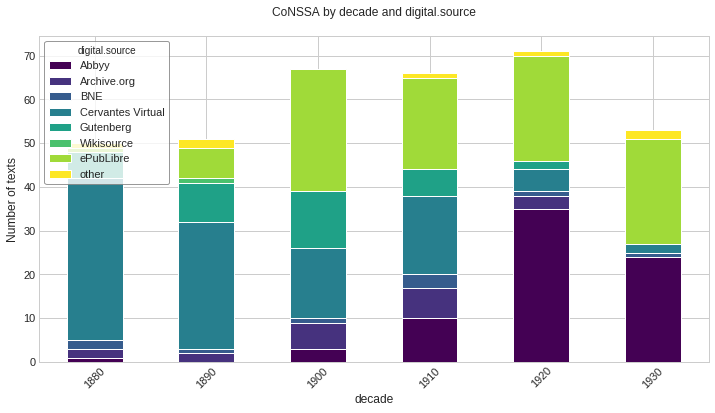

In [102]:
dict_values = {'#abbyy': "Abbyy", '#bne' : "BNE", '#gutenberg' : "Gutenberg", '#other': "other", '#archive': "Archive.org", '#wikisource' : "Wikisource", '#epublibre': "ePubLibre", '#bvmc': "Cervantes Virtual"}
metadata["digital.source"] = metadata["digital.source"].map(dict_values)

describe_data.describe_corpus_stackedbars(wdir = wdir, metadata = metadata, class_1 = "decade", class_2 = "digital.source", dataset = dataset, loc_legend="upper left")

(8, 6)


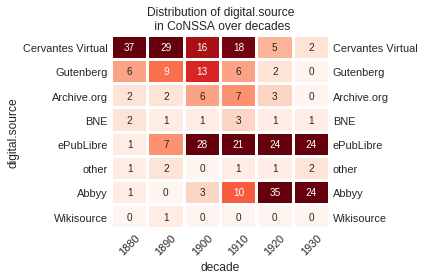

In [103]:
describe_data.chronological_heatmap(wdir = wdir, dataset = dataset, metadata = metadata, class_1 = "decade", class_2 = "digital.source")


In [104]:
Counter(metadata.loc[metadata["decade"] == 1920]["digital.source"])

Counter({'Abbyy': 35,
         'Archive.org': 3,
         'BNE': 1,
         'Cervantes Virtual': 5,
         'Gutenberg': 2,
         'ePubLibre': 24,
         'other': 1})

In [105]:
other_corpora = load_data.load_metadata(wdir = "/home/jose/Dropbox/Doktorarbeit/ne_data/", metadata_table = "other_corpora.csv" , sep = "\t")
print(other_corpora.head())


metadata and class shape: 	 (10, 4)
                 corpora  lexical_tokens encoding    cert
id                                                       
1                 CoNSSA        22566933      TEI    high
2           CoNSSA-canon         9673413      TEI    high
3                   ADSO          355000      TEI  medium
4                  DISCO          286090      TEI  medium
5   IMPACT ES Diachronic         8000000      TEI  medium


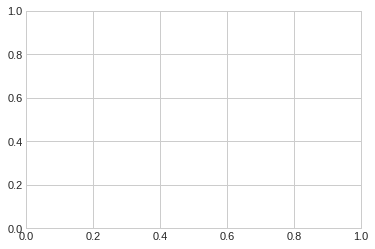

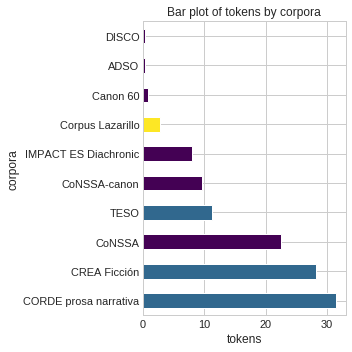

In [106]:
other_corpora["tokens"] = other_corpora["lexical_tokens"] / 1000000
results = describe_data.simple_grouped_bars(metadata = other_corpora,  class_numerical = "tokens", class_categorical ="corpora", wdir = wdir , dataset = "corpora", class_color = "encoding",  figsize = (5,5),  colors_values = {'TEI':'#440154','markup':'#31688e', "plaintext":"#fde725"})


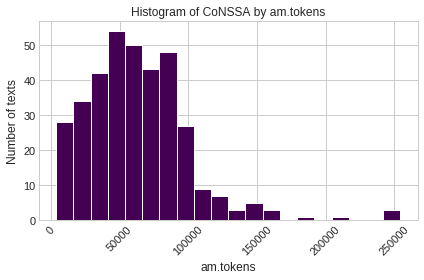

In [107]:
describe_data.histogram(metadata = metadata, class_ ="am.tokens", kind = "normal", wdir = wdir, dataset = dataset, bins = 20)

In [108]:
metadata["am.tokens"].median()

59629.0

In [109]:
stats.iqr(metadata["am.tokens"])

46841.25

In [110]:
metadata.loc[metadata["am.tokens"] > 55629].sort_values(by ="am.tokens")[["title","am.tokens"]]

,title,am.tokens
ne0363,Nardo,55938
ne0131,Espirituados,56015
ne0239,Romanticos,56082
ne0220,Barrio,56754
ne0177,Mairena,57234
ne0169,Viuda,57286
ne0081,Solteron,57817
ne0306,CapitanRibot,57980
ne0331,HombreEspiritu,58750
ne0121,Voluntad,58942


In [111]:
metadata.sort_values(by ="am.tokens")[["title","am.tokens","decade"]]

,title,am.tokens,decade
ne0334,Erika,3787,1930
ne0320,Calisto,4595,1930
ne0198,HistoriaVulgar,6389,1910
ne0380,Crimen,7692,1930
ne0349,AmorSacrificio,8158,1920
ne0403,CartasMujeres,8893,1890
ne0333,Cazador,8898,1930
ne0050,Zapatos,10993,1910
ne0215,HombreOro,11108,1890
ne0319,FamiliaGomar,11236,1910


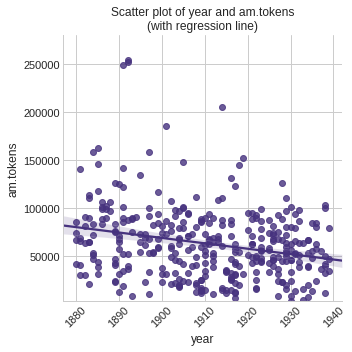

In [112]:
describe_data.describe_corpus_scatter(metadata = metadata, class_1 = "year", class_2 = "am.tokens", wdir = wdir, dataset = dataset)


In [113]:
stats.linregress(metadata["year"],metadata["am.tokens"])

LinregressResult(slope=-561.9572898100827, intercept=1136663.1809152607, rvalue=-0.24627848909920744, pvalue=2.4011144938311927e-06, stderr=117.21004545292426)

In [114]:
metadata_canon

,idno,author.name,title,year,supergenre,genre,subgenre.cligs.important,author.country,author.viaf,author.bne,...,am.wnlex.noun.Topss,am.wnlex.noun.relations,am.wnlex.noun.attributes,am.wnlex.verb.emotions,am.wnlex.noun.locations,am.wnlex.noun.events,am.wnlex.verb.contacts,am.wnlex.xxxs,am.wnlex.verb.changes,decade
ne0002,ne0002,Galdos,Misericordia,1889,narrative,novela,realist,Spain,71395987.0,XX1014802,...,239,39,821,314,336,355,684,70169,764,1880
ne0003,ne0003,Galdos,Nazarin,1895,narrative,novela,realist,Spain,71395987.0,XX1014802,...,253,17,725,396,301,327,498,54401,572,1890
ne0004,ne0004,Galdos,Halma,1895,narrative,novela,realist,Spain,71395987.0,XX1014802,...,288,24,1061,424,282,248,450,60648,553,1890
ne0006,ne0006,Galdos,Angel,1891,narrative,novela,bildungsroman,Spain,71395987.0,XX1014802,...,841,98,2867,1334,920,1237,1974,198080,2378,1890
ne0009,ne0009,Galdos,Desheredada,1881,narrative,novela,bildungsroman,Spain,71395987.0,XX1014802,...,494,43,1813,780,608,689,1169,114674,1331,1880
ne0011,ne0011,Galdos,Manso,1882,narrative,novela,philosophical,Spain,71395987.0,XX1014802,...,377,28,1232,516,326,407,656,72190,797,1880
ne0013,ne0013,Valle,SonataOtono,1902,narrative,novela,memoir,Spain,68936773.0,XX1055436,...,35,1,222,137,86,76,316,16888,292,1900
ne0014,ne0014,Valle,SonataEstio,1903,narrative,novela,memoir,Spain,68936773.0,XX1055436,...,41,4,261,121,103,85,276,17715,253,1900
ne0015,ne0015,Valle,SonataPrimavera,1904,narrative,novela,memoir,Spain,68936773.0,XX1055436,...,39,0,253,116,103,86,216,14854,266,1900
ne0016,ne0016,Valle,SonataInvierno,1905,narrative,novela,memoir,Spain,68936773.0,XX1055436,...,63,3,296,162,96,108,236,19339,283,1900


In [115]:
stats.linregress(metadata_canon["year"],metadata_canon["am.tokens"])


LinregressResult(slope=-996.7224067301456, intercept=1970283.3074020583, rvalue=-0.4566542162454312, pvalue=1.8071166909466522e-08, stderr=166.5074544107558)

In [116]:
metadata["am.chapters"].median()

25.0

In [117]:
stats.iqr(metadata["am.chapters"])

23.0

In [118]:
metadata.sort_values(by ="am.chapters")[["title","am.chapters","decade"]]

,title,am.chapters,decade
ne0299,Pachin,1,1890
ne0181,Velada,1,1930
ne0272,TigreJuan,2,1920
ne0215,HombreOro,3,1890
ne0332,Estacion,3,1930
ne0172,Greguerias,4,1910
ne0120,Loco,4,1880
ne0200,FrayAntonio,4,1910
ne0290,Gusanos,4,1900
ne0392,LunaHiel,5,1920


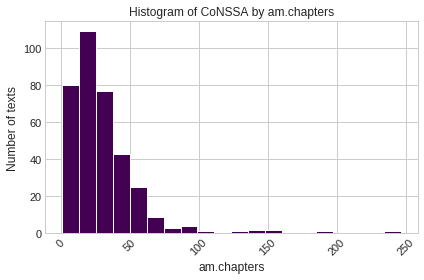

In [119]:
describe_data.histogram(metadata = metadata, class_ ="am.chapters", kind = "normal", wdir = wdir, dataset = dataset, bins = 20)

In [120]:
stats.linregress(metadata["year"], metadata["am.ss"])


LinregressResult(slope=-4.834895872878569, intercept=11822.778549713737, rvalue=-0.05102337794283455, pvalue=0.33571892169665196, stderr=5.015645853574662)

In [121]:
stats.linregress(metadata_canon["year"], metadata_canon["am.ss"])


LinregressResult(slope=-17.805091849501583, intercept=36870.70108629853, rvalue=-0.1979747934455343, pvalue=0.01993279593732623, stderr=7.559319728816335)

In [122]:
stats.linregress(metadata["year"], metadata["am.chapters"])


LinregressResult(slope=0.048873420680770774, intercept=-63.25044777235392, rvalue=0.030200917117891028, pvalue=0.5689763803856945, stderr=0.08572933536761226)

In [123]:
stats.linregress(metadata_canon["year"], metadata_canon["am.chapters"])


LinregressResult(slope=0.04774986572618069, intercept=-56.13789261509505, rvalue=0.026442153469239456, pvalue=0.7581938995137371, stderr=0.15479395591872813)

In [124]:
stats.linregress(metadata["year"], metadata["am.chapters"])


LinregressResult(slope=0.048873420680770774, intercept=-63.25044777235392, rvalue=0.030200917117891028, pvalue=0.5689763803856945, stderr=0.08572933536761226)

In [125]:
stats.linregress(metadata["year"], metadata["len.chapters.median"])


LinregressResult(slope=-49.564507258862264, intercept=112532.2322424594, rvalue=-0.03921521891857719, pvalue=0.45949635783180565, stderr=66.93556859743045)

In [126]:
stats.linregress(metadata_canon["year"], metadata_canon["len.chapters.median"])


LinregressResult(slope=33.73335450927197, intercept=-46144.609444999136, rvalue=0.023613693030741793, pvalue=0.7833829067413246, stderr=122.46304292941215)

In [127]:
stats.linregress(metadata["year"], metadata["len.ss.median"])


LinregressResult(slope=-0.9739083320390365, intercept=1975.7632357953842, rvalue=-0.42292273032654276, pvalue=5.756623080154444e-17, stderr=0.11059607077718646)

In [128]:
stats.linregress(metadata_canon["year"], metadata_canon["len.ss.median"])


LinregressResult(slope=-1.1988032554803907, intercept=2398.9696428626885, rvalue=-0.4836343681487106, pvalue=1.868169497781363e-09, stderr=0.18603874932721534)

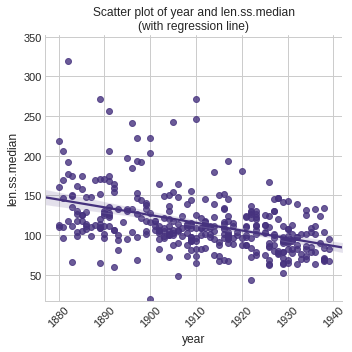

In [129]:
describe_data.describe_corpus_scatter(metadata = metadata, class_1 = "year", class_2 = "len.ss.median", wdir = wdir, dataset = dataset)

In [130]:
format_ = "png"
basic_color = "#55a868"
darker_basic_color = "#33643e"
classic_blue ="#4c72b0"
color_boxplots = dict(boxes=basic_color, whiskers=darker_basic_color,
                medians=darker_basic_color, caps=basic_color, means=basic_color)
flierprops = dict(marker='o', markerfacecolor=darker_basic_color, markersize=5)
boxprops = dict(linewidth=5)
medianprops = dict(linewidth=5)
meanlineprops = dict(linestyle='--', linewidth=2)

In [131]:
data = metadata["am.fts"]
data = data[ (data < (data.median() + (1.5 * stats.iqr(data.median()))))]
data = data[~((data-data.mean()).abs()>1*data.std())]
#data[((data-data.mean()).abs()>1*data.std())]
data

Series([], Name: am.fts, dtype: int64)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


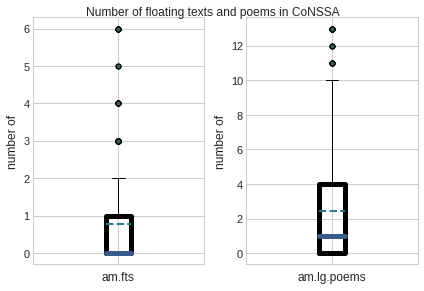

In [132]:
classes = ["am.fts","am.lg.poems"]
fig = plt.figure()

for i in range(2):
    if i == 0:
        ax = fig.add_subplot(1, 2, i+1)
    else:
        ax = fig.add_subplot(1, 2, i+1, sharex=ax)
    
    data = metadata[classes[i]]
    #data = ( (data < data.median() - (1.5*stats.iqr(data)) ))
    data = data[~((data-data.mean()).abs()>1*data.std())]
    
    ax.boxplot(data, meanline=True, showmeans=True, flierprops=flierprops,
            boxprops=boxprops, medianprops=medianprops, meanprops=meanlineprops)
    #ax.set_title(classes[i])
    ax.set_xticklabels("")
    ax.set_ylabel("number of")
    ax.set_xlabel(classes[i])

fig.suptitle("Number of floating texts and poems in CoNSSA", y =1)
fig.tight_layout()
fig.savefig(wdir+"/visualisations/boxplots_fts_lgs.png", dpi=300)
fig.show()

In [133]:
metadata_canon["am.lg.poems"].median()

1.5

In [134]:
metadata["am.lg.poems"].median()

1.0

In [135]:
stats.iqr(metadata["am.lg.poems"])

5.0

In [136]:
stats.linregress(metadata_canon["year"], metadata_canon["am.lg.poems"])


LinregressResult(slope=0.08334795081076564, intercept=-153.43245134320415, rvalue=0.15344865619886094, pvalue=0.07235552527861358, stderr=0.046024403493042286)

In [137]:
stats.linregress(metadata_canon["year"], metadata_canon["am.fts"])


LinregressResult(slope=0.029818877812376805, intercept=-54.99636218849253, rvalue=0.11931608004981306, pvalue=0.16335325258524017, stderr=0.021276944916092562)

# 3.1.10. Gender Distribution

In [138]:
male_authors = novel_authors.loc[(novel_authors['author-gender'] == "male" ) & (novel_authors['novels'] > 0)].shape[0]
print("Amount male novel authors: ", male_authors)



Amount male novel authors:  100


In [139]:
female_authors = novel_authors.loc[(novel_authors['author-gender'] == "female" ) & (novel_authors['novels'] > 0)].shape[0]
print("Amount male novel authors", female_authors)

Amount male novel authors 7


In [140]:
(female_authors/novel_authors.shape[0])*100

6.5420560747663545

In [141]:
(male_authors/novel_authors.shape[0])*100

93.45794392523365

In [142]:
median_female_pages = novel_authors.loc[(novel_authors['author-gender'] == "female" ) & (novel_authors['novels'] > 0)]["pages-in-MdLE"].median()
print("median female pages in MdLE", median_female_pages)

q3_female_pages = novel_authors.loc[(authors['author-gender'] == "female" ) & (novel_authors['novels'] > 0)]["pages-in-MdLE"].quantile(0.75)
q1_female_pages = novel_authors.loc[(authors['author-gender'] == "female" ) & (novel_authors['novels'] > 0)]["pages-in-MdLE"].quantile(0.25)
iqr_female_pages = q3_female_pages - q1_female_pages
print("iqr female pages in MdLE", iqr_female_pages)


median female pages in MdLE 5.0
iqr female pages in MdLE nan


/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:3772: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [143]:
wdir

'/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_1/'

In [144]:
median_male_pages = novel_authors.loc[(novel_authors['author-gender'] == "male" ) & (novel_authors['novels'] > 0)]["pages-in-MdLE"].median()
print("median male pages in MdLE", median_female_pages)

q3_male_pages = novel_authors.loc[(novel_authors['author-gender'] == "male" ) & (novel_authors['novels'] > 0)]["pages-in-MdLE"].quantile(0.75)
q1_male_pages = novel_authors.loc[(novel_authors['author-gender'] == "male" ) & (novel_authors['novels'] > 0)]["pages-in-MdLE"].quantile(0.25)
iqr_male_pages = q3_male_pages - q1_male_pages
print("iqr male pages in MdLE", iqr_male_pages)

median male pages in MdLE 5.0
iqr male pages in MdLE 21.5


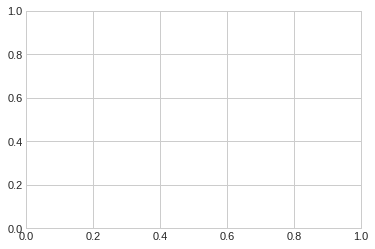

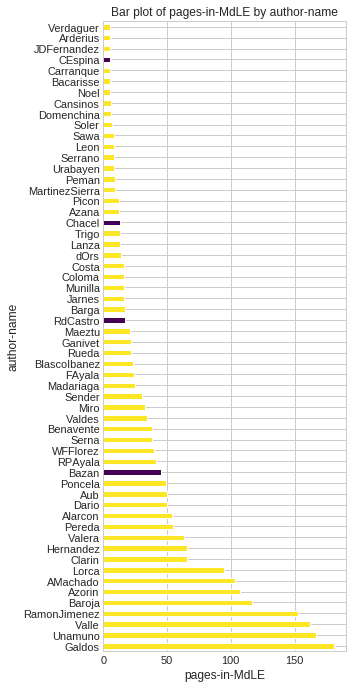

In [145]:
authors = novel_authors.loc[(novel_authors['pages-in-MdLE'] > 4) & (novel_authors['novels'] > 0)].copy()
results =  describe_data.simple_grouped_bars(metadata = authors, class_numerical = "pages-in-MdLE", class_categorical="author-name", wdir = wdir, dataset = dataset, class_color ="author-gender", colors_values = {'female':'#440154','male':'#fde725'})


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


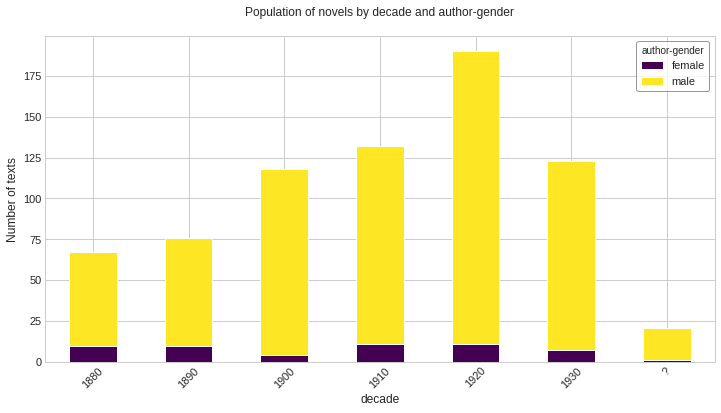

In [146]:
describe_data.describe_corpus_stackedbars(wdir = wdir, metadata = population_novels, class_1 = "decade", class_2 = "author-gender", dataset = "Population of novels", cmap="viridis", loc_legend ="upper right")


In [147]:
print("amount of others in MdLe",
    population_novels.loc[(population_novels['author-gender'] == "male" )].shape)

print("amount of others in MdLe",
    population_novels.loc[(population_novels['author-gender'] == "female" )].shape)



amount of others in MdLe (673, 66)
amount of others in MdLe (54, 66)


In [148]:
population_novels.loc[(population_novels['author-gender'] == "male" )].shape[0] / population_novels.shape[0]



0.9257221458046767

In [149]:
population_novels.loc[(population_novels['author-gender'] == "female" )].shape[0] / population_novels.shape[0]



0.07427785419532325

In [150]:
population_novels.loc[(population_novels['author-gender'] == "female" ) & (population_novels['decade'] == "1880")].shape[0] / population_novels.loc[(population_novels['decade'] == "1880")].shape[0]



0.14925373134328357

In [151]:
population_novels.loc[(population_novels['author-gender'] == "female" ) & (population_novels['decade'] == "1920")].shape[0] / population_novels.loc[(population_novels['decade'] == "1920")].shape[0]



0.05789473684210526

In [152]:
population_novels.loc[(population_novels['author-gender'] == "female" ) & (population_novels['decade'] == "1930")].shape[0] / population_novels.loc[(population_novels['decade'] == "1930")].shape[0]


0.056910569105691054